# Predicting top 10 WRs of 2025

In [43]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [49]:
# Loading in the datasets
df_2022 = pd.read_csv('/content/Top 75 of 2025 Dataset - Top 75 WRs 2022.csv')
df_2023 = pd.read_csv('/content/Top 75 of 2025 Dataset - Top 75 WRs 2023.csv')
df_2024 = pd.read_csv('/content/Top 75 of 2025 Dataset - Top 75 WRs 2024.csv')

In [50]:
# Merging using an outer join to retain all players
merged_df = df_2022.merge(df_2023, on='Player', how='outer').merge(df_2024, on='Player', how='outer')

In [51]:
merged_df.head()

,Player,Rec_x,Yds_x,TD_x,20+_x,40+_x,LNG_x,Rec 1st_x,1st%_x,Rec FUM_x,...,Yds,TD,20+,40+,LNG,Rec 1st,1st%,Rec FUM,Rec YAC/R,Tgts
0,A.J. Brown,88.0,1496.0,11.0,23.0,6.0,78.0,59.0,67.0,2.0,...,1079.0,7.0,17.0,5.0,67.0,51.0,76.1,0.0,353.0,97.0
1,Aaron Jones,59.0,395.0,5.0,5.0,0.0,30.0,19.0,32.2,2.0,...,408.0,2.0,4.0,0.0,25.0,20.0,39.2,2.0,411.0,62.0
2,Adam Thielen,70.0,716.0,6.0,7.0,0.0,36.0,45.0,64.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Allen Lazard,60.0,788.0,6.0,13.0,2.0,47.0,45.0,75.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alvin Kamara,57.0,490.0,2.0,3.0,1.0,54.0,17.0,29.8,2.0,...,543.0,2.0,7.0,1.0,57.0,18.0,26.5,1.0,542.0,89.0


In [52]:
# Filling missing values to prevent data loss
merged_df.fillna(0, inplace=True)

In [53]:
# Displaying results
print(f"Total players merged in dataset: {len(merged_df)}")
print(merged_df.head())

Total players merged in dataset: 124
         Player  Rec_x   Yds_x  TD_x  20+_x  40+_x  LNG_x  Rec 1st_x  1st%_x  \
0    A.J. Brown   88.0  1496.0  11.0   23.0    6.0   78.0       59.0    67.0   
1   Aaron Jones   59.0   395.0   5.0    5.0    0.0   30.0       19.0    32.2   
2  Adam Thielen   70.0   716.0   6.0    7.0    0.0   36.0       45.0    64.3   
3  Allen Lazard   60.0   788.0   6.0   13.0    2.0   47.0       45.0    75.0   
4  Alvin Kamara   57.0   490.0   2.0    3.0    1.0   54.0       17.0    29.8   

   Rec FUM_x  ...     Yds   TD   20+  40+   LNG  Rec 1st  1st%  Rec FUM  \
0        2.0  ...  1079.0  7.0  17.0  5.0  67.0     51.0  76.1      0.0   
1        2.0  ...   408.0  2.0   4.0  0.0  25.0     20.0  39.2      2.0   
2        0.0  ...     0.0  0.0   0.0  0.0   0.0      0.0   0.0      0.0   
3        0.0  ...     0.0  0.0   0.0  0.0   0.0      0.0   0.0      0.0   
4        2.0  ...   543.0  2.0   7.0  1.0  57.0     18.0  26.5      1.0   

   Rec YAC/R  Tgts  
0      353

In [56]:
merged_df.head()

,Player,Rec_x,Yds_x,TD_x,20+_x,40+_x,LNG_x,Rec 1st_x,1st%_x,Rec FUM_x,...,Yds,TD,20+,40+,LNG,Rec 1st,1st%,Rec FUM,Rec YAC/R,Tgts
0,A.J. Brown,88.0,1496.0,11.0,23.0,6.0,78.0,59.0,67.0,2.0,...,1079.0,7.0,17.0,5.0,67.0,51.0,76.1,0.0,353.0,97.0
1,Aaron Jones,59.0,395.0,5.0,5.0,0.0,30.0,19.0,32.2,2.0,...,408.0,2.0,4.0,0.0,25.0,20.0,39.2,2.0,411.0,62.0
2,Adam Thielen,70.0,716.0,6.0,7.0,0.0,36.0,45.0,64.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Allen Lazard,60.0,788.0,6.0,13.0,2.0,47.0,45.0,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alvin Kamara,57.0,490.0,2.0,3.0,1.0,54.0,17.0,29.8,2.0,...,543.0,2.0,7.0,1.0,57.0,18.0,26.5,1.0,542.0,89.0


In [57]:
merged_df.columns

Index(['Player', 'Rec_x', 'Yds_x', 'TD_x', '20+_x', '40+_x', 'LNG_x',
       'Rec 1st_x', '1st%_x', 'Rec FUM_x', 'Rec YAC/R_x', 'Tgts_x', 'Rec_y',
       'Yds_y', 'TD_y', '20+_y', '40+_y', 'LNG_y', 'Rec 1st_y', '1st%_y',
       'Rec FUM_y', 'Rec YAC/R_y', 'Tgts_y', 'Rec', 'Yds', 'TD', '20+', '40+',
       'LNG', 'Rec 1st', '1st%', 'Rec FUM', 'Rec YAC/R', 'Tgts'],
      dtype='object')

In [62]:
merged_df = merged_df.rename(columns={
    'Rec_x': 'Rec_2022', 'Yds_x': 'Rec_Yds_2022', 'TD_x': 'Rec_TDs_2022',
    'Rec_y':'Rec_2023', 'Yds_y': 'Rec_Yds_2023', 'TD_y': 'Rec_TDs_2023',
    'Rec':'Rec_2024', 'Yds': 'Rec_Yds_2024', 'TD': 'Rec_TDs_2024'
})

# Cleaning the data

In [66]:
# Dropping uneeded columns
merged_df = merged_df[['Player', 'Rec_2022', 'Rec_Yds_2022', 'Rec_TDs_2022',
                       'Rec_2023', 'Rec_Yds_2023', 'Rec_TDs_2023',
                       'Rec_2024', 'Rec_Yds_2024', 'Rec_TDs_2024']]

In [67]:
# Checking updated dataset
merged_df.head()

,Player,Rec_2022,Rec_Yds_2022,Rec_TDs_2022,Rec_2023,Rec_Yds_2023,Rec_TDs_2023,Rec_2024,Rec_Yds_2024,Rec_TDs_2024
0,A.J. Brown,88.0,1496.0,11.0,106.0,1456.0,7.0,67.0,1079.0,7.0
1,Aaron Jones,59.0,395.0,5.0,0.0,0.0,0.0,51.0,408.0,2.0
2,Adam Thielen,70.0,716.0,6.0,103.0,1014.0,4.0,0.0,0.0,0.0
3,Allen Lazard,60.0,788.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alvin Kamara,57.0,490.0,2.0,75.0,466.0,1.0,68.0,543.0,2.0


In [72]:
# Computing average 'Receptions', 'Receiving Yards' and 'Receiving TDs'
merged_df.loc[:, 'Avg Receptions'] = merged_df[['Rec_2022',
                                         'Rec_2023',
                                         'Rec_2024']].mean(axis=1)

merged_df.loc[:, 'Avg Rec Yards'] = merged_df[['Rec_Yds_2022',
                                        'Rec_Yds_2023',
                                        'Rec_Yds_2024']].mean(axis=1)

merged_df.loc[:, 'Avg Rec TDs'] = merged_df[['Rec_TDs_2022',
                                      'Rec_TDs_2023',
                                      'Rec_TDs_2024']].mean(axis=1)

In [74]:
# Checking new averaged columns
print(merged_df.head())

         Player  Rec_2022  Rec_Yds_2022  Rec_TDs_2022  Rec_2023  Rec_Yds_2023  \
0    A.J. Brown      88.0        1496.0          11.0     106.0        1456.0   
1   Aaron Jones      59.0         395.0           5.0       0.0           0.0   
2  Adam Thielen      70.0         716.0           6.0     103.0        1014.0   
3  Allen Lazard      60.0         788.0           6.0       0.0           0.0   
4  Alvin Kamara      57.0         490.0           2.0      75.0         466.0   

   Rec_TDs_2023  Rec_2024  Rec_Yds_2024  Rec_TDs_2024  Avg Receptions  \
0           7.0      67.0        1079.0           7.0       87.000000   
1           0.0      51.0         408.0           2.0       36.666667   
2           4.0       0.0           0.0           0.0       57.666667   
3           0.0       0.0           0.0           0.0       20.000000   
4           1.0      68.0         543.0           2.0       66.666667   

   Avg Rec Yards  Avg Rec TDs  
0    1343.666667     8.333333  
1     267.

# Feature Engineering

In [211]:
# Assigning features (X) and target (y)
features = ['Avg Receptions', 'Avg Rec Yards', 'Avg Rec TDs']
target_yds = ['Rec_Yds_2024']
target_tds = ['Rec_TDs_2024']

X = merged_df[features]
y_yds = merged_df[target_yds]
y_tds = merged_df[target_tds]

In [212]:
# Splitting into training/testing (80/20)
X_train, X_test, y_train_yds, y_test_yds = train_test_split(X, y_yds, test_size=0.2, random_state=42)
X_train, X_test, y_train_tds, y_test_tds = train_test_split(X, y_tds, test_size=0.2, random_state=42)

## Fixing NaN values in data

In [215]:
print(y_test_yds.isna().sum())

Rec_Yds_2024    1
dtype: int64


In [216]:
y_test_yds = y_test_yds.fillna(y_test_yds.median())

In [217]:
print(y_test_yds.isna().sum())

Rec_Yds_2024    0
dtype: int64


In [218]:
print(y_train_yds.isna().sum())

Rec_Yds_2024    2
dtype: int64


In [219]:
y_train_yds = y_train_yds.fillna(y_train_yds.median())

In [220]:
print(y_train_yds.isna().sum())

Rec_Yds_2024    0
dtype: int64


In [221]:
print(y_train_tds.isna().sum())

Rec_TDs_2024    2
dtype: int64


In [222]:
y_train_tds = y_train_tds.fillna(y_train_tds.median())

In [223]:
print(y_train_tds.isna().sum())

Rec_TDs_2024    0
dtype: int64


In [224]:
print(y_test_tds.isna().sum())

Rec_TDs_2024    1
dtype: int64


In [225]:
y_test_tds = y_test_tds.fillna(y_test_tds.median())

In [226]:
print(y_test_tds.isna().sum())

Rec_TDs_2024    0
dtype: int64


## Training and fitting model

In [227]:
# Initilize Random Forest Model
rf_yds = RandomForestRegressor(n_estimators=100, random_state=42)
rf_tds = RandomForestRegressor(n_estimators=100, random_state=42)

In [228]:
# Training the model
rf_yds.fit(X_train, y_train_yds.values.reshape(-1,))
rf_tds.fit(X_train, y_train_tds.values.reshape(-1,))

RandomForestRegressor(random_state=42)

In [229]:
# Predicting based on 2024 data
y_pred_yds = rf_yds.predict(X_test)
y_pred_tds = rf_tds.predict(X_test)

In [230]:
#Evaluating the model
print("MAE for Reciving Yards:", mean_absolute_error(y_test_yds, y_pred_yds))
print("MAE for Reveining TDs:", mean_absolute_error(y_test_tds, y_pred_tds))

MAE for Reciving Yards: 323.23051282051284
MAE for Reveining TDs: 2.492307692307693


# Predicting Stats for 2025

In [231]:
# Predicting 2025 stats
merged_df.loc[:, 'Predicting Receiving Yards 2025'] = rf_yds.predict(X)
merged_df.loc[:, 'Predicting Receiving TDs 2025'] = rf_tds.predict(X)

In [232]:
# Predicting stats for Top 10 WRs 2025 via Receiving Yards
top_10_yds = merged_df.sort_values(by='Predicting Receiving Yards 2025', ascending=False).head(10)

In [233]:
# Diplaying Top 10 WRs Rec Yards stats for 2025
print(top_10_yds[['Player', 'Predicting Receiving Yards 2025']])

                Player  Predicting Receiving Yards 2025
53       Ja'Marr Chase                          1496.54
72    Justin Jefferson                          1412.92
6    Amon-Ra St. Brown                          1241.90
16         CeeDee Lamb                          1227.94
0           A.J. Brown                          1195.53
118        Tyreek Hill                          1143.80
43        Drake London                          1121.96
34       Davante Adams                          1114.75
111       Travis Kelce                          1077.58
64         Jerry Jeudy                          1077.26


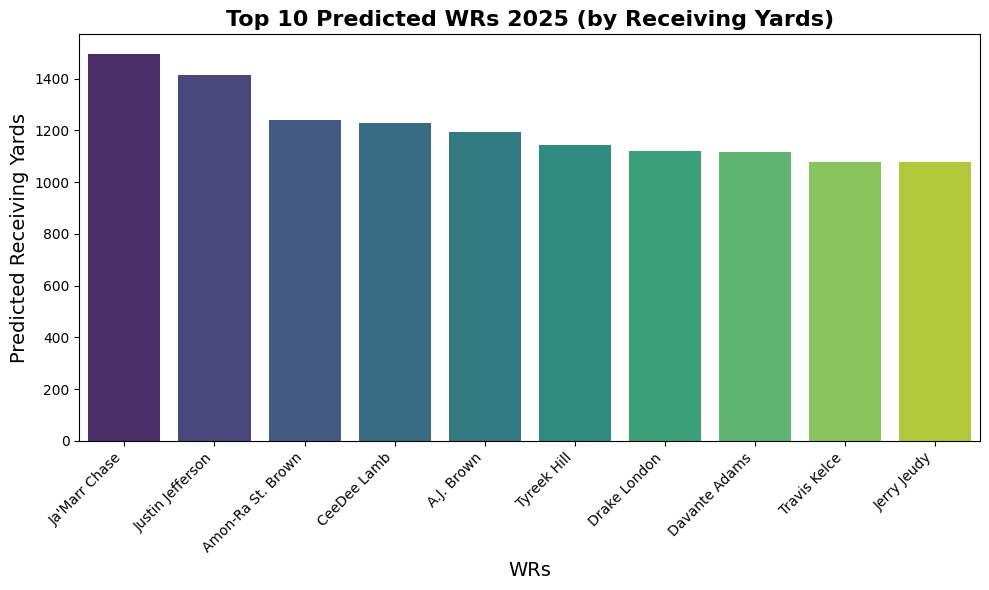

In [234]:
# Plotting the Predicted 2025 WRs via Rec Yards
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Predicting Receiving Yards 2025', data=top_10_yds, hue='Player', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted WRs 2025 (by Receiving Yards)', fontsize=16, weight='bold')
plt.xlabel('WRs', fontsize=14)
plt.ylabel('Predicted Receiving Yards', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [235]:
# Predicting stats for Top 10 WRs 2025 via Receiving TDs
top_10_tds = merged_df.sort_values(by='Predicting Receiving TDs 2025', ascending=False).head(10)

In [236]:
# Diplaying Top 10 WRs Rec TDs stats for 2025
print(top_10_tds[['Player', 'Predicting Receiving TDs 2025']])

                Player  Predicting Receiving TDs 2025
53       Ja'Marr Chase                          12.94
86          Mike Evans                          10.47
82        Mark Andrews                          10.37
6    Amon-Ra St. Brown                          10.29
109     Terry McLaurin                          10.24
104        Sam LaPorta                           9.52
34       Davante Adams                           9.24
72    Justin Jefferson                           9.14
0           A.J. Brown                           9.01
108        Tee Higgins                           9.01


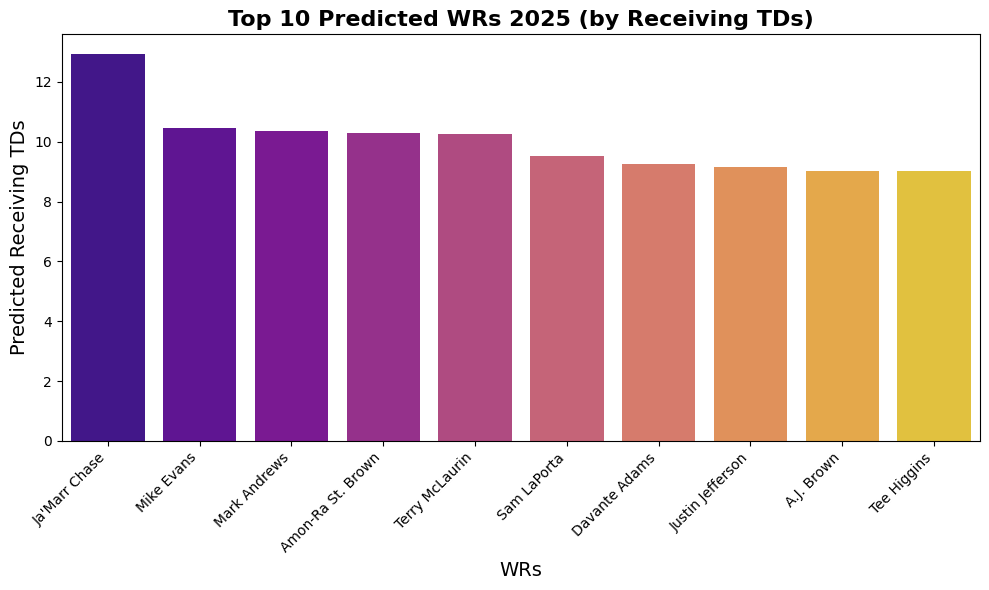

In [237]:
# Plotting the Predicted 2025 WRs via Rec TDs
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Predicting Receiving TDs 2025', data=top_10_tds, hue='Player', palette='plasma', legend=False)

# Adding labels
plt.title('Top 10 Predicted WRs 2025 (by Receiving TDs)', fontsize=16, weight='bold')
plt.xlabel('WRs', fontsize=14)
plt.ylabel('Predicted Receiving TDs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Creating model for Predicted Receptions

In [239]:
# Loading in the data
rec_2022 = pd.read_csv('/content/Top 75 of 2025 Dataset - Top 75 WRs 2022.csv')
rec_2023 = pd.read_csv('/content/Top 75 of 2025 Dataset - Top 75 WRs 2023.csv')
rec_2024 = pd.read_csv('/content/Top 75 of 2025 Dataset - Top 75 WRs 2024.csv')

In [240]:
# Merging using an outer join to retain all players
merged_rec = rec_2022.merge(rec_2023, on='Player', how='outer').merge(rec_2024, on='Player', how='outer')

In [241]:
# Filling missing values to prevent data loss
merged_rec.fillna(0, inplace=True)

In [244]:
merged_rec.columns

Index(['Player', 'Rec_x', 'Yds_x', 'TD_x', '20+_x', '40+_x', 'LNG_x',
       'Rec 1st_x', '1st%_x', 'Rec FUM_x', 'Rec YAC/R_x', 'Tgts_x', 'Rec_y',
       'Yds_y', 'TD_y', '20+_y', '40+_y', 'LNG_y', 'Rec 1st_y', '1st%_y',
       'Rec FUM_y', 'Rec YAC/R_y', 'Tgts_y', 'Rec', 'Yds', 'TD', '20+', '40+',
       'LNG', 'Rec 1st', '1st%', 'Rec FUM', 'Rec YAC/R', 'Tgts'],
      dtype='object')

In [246]:
merged_rec = merged_rec.rename(columns={
    'Rec_x': 'Rec_2022', 'Yds_x': 'Rec_Yds_2022', 'TD_x': 'Rec_TDs_2022',
    '20+_x': '20+_2022', '40+_x': '40+_2022', 'LNG_x': 'LNG_2022', 'Rec 1st_x': 'Rec 1st_2022',
    '1st%_x': '1st%_2022', 'Rec FUM_x': 'Rec FUM_2022', 'Rec YAC/R_x': 'Rec YAC_2022',
    'Tgts_x': 'Tgts_2022',
    'Rec_y':'Rec_2023', 'Yds_y': 'Rec_Yds_2023', 'TD_y': 'Rec_TDs_2023', '20+_y': '20+_2023',
    '40+_y': '40+_2023', 'LNG_y': 'LNG_2023', 'Rec 1st_y': 'Rec 1st_2023', '1st%_y': '1st%_2023',
    'Rec FUM_y': 'Rec FUM_2023', 'Rec YAC/R_y': 'Rec YAC_2023', 'Tgts_y': 'Tgts_2023',
    'Rec':'Rec_2024', 'Yds': 'Rec_Yds_2024', 'TD': 'Rec_TDs_2024', '20+': '20+_2024',
    '40+': '40+_2024', 'LNG': 'LNG_2024', 'Rec 1st': 'Rec 1st_2024', '1st%': '1st%_2024',
    'Rec FUM': 'Rec FUM_2024', 'Rec YAC/R': 'Rec YAC_2024', 'Tgts': 'Tgts_2024'
})

In [247]:
merged_rec.columns

Index(['Player', 'Rec_2022', 'Rec_Yds_2022', 'Rec_TDs_2022', '20+_2022',
       '40+_2022', 'LNG_2022', 'Rec 1st_2022', '1st%_2022', 'Rec FUM_2022',
       'Rec YAC_2022', 'Tgts_2022', 'Rec_2023', 'Rec_Yds_2023', 'Rec_TDs_2023',
       '20+_2023', '40+_2023', 'LNG_2023', 'Rec 1st_2023', '1st%_2023',
       'Rec FUM_2023', 'Rec YAC_2023', 'Tgts_2023', 'Rec_2024', 'Rec_Yds_2024',
       'Rec_TDs_2024', '20+_2024', '40+_2024', 'LNG_2024', 'Rec 1st_2024',
       '1st%_2024', 'Rec FUM_2024', 'Rec YAC_2024', 'Tgts_2024'],
      dtype='object')

In [248]:
# Assigning features (X) and target (y)
features = ['20+_2022', '40+_2022', 'LNG_2022', 'Rec 1st_2022', '1st%_2022', 'Rec FUM_2022',
       'Rec YAC_2022', 'Tgts_2022', 'Rec_2023', '20+_2023', '40+_2023', 'LNG_2023',
       'Rec 1st_2023', '1st%_2023', 'Rec FUM_2023', 'Rec YAC_2023', 'Tgts_2023', 'Rec_2024',
       '20+_2024', '40+_2024', 'LNG_2024', 'Rec 1st_2024', '1st%_2024', 'Rec FUM_2024', 'Rec YAC_2024', 'Tgts_2024'
            ]
target = ['Rec_2024']

X = merged_rec[features]
y = merged_rec[target]

In [249]:
# Splitting into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
# Initializing Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [251]:
# Training the model
rf.fit(X_train, y_train.values.reshape(-1,))

RandomForestRegressor(random_state=42)

In [252]:
# Predicting on 2024 test data
y_pred = rf.predict(X_test)

In [254]:
# Evaluating the model
print("MAE for Receptions:", mean_absolute_error(y_test, y_pred))

MAE for Receptions: 0.9404000000000005


In [255]:
# Predicting stats for 2025
merged_rec['Predicted Receptions in 2025'] = rf.predict(X)

In [256]:
# Predicting stats for Top 10 WRs 2025 by receptions
top_10_rec = merged_rec.sort_values(by='Predicted Receptions in 2025', ascending=False).head(10)

In [257]:
# Displaying Top 10 WRs stats for 2025
print(top_10_rec[['Player', 'Predicted Receptions in 2025']])

                 Player  Predicted Receptions in 2025
13         Brock Bowers                        110.09
112        Trey McBride                        109.52
53        Ja'Marr Chase                        109.35
6     Amon-Ra St. Brown                        109.12
81         Malik Nabers                        108.55
72     Justin Jefferson                        102.42
46       Garrett Wilson                        101.49
43         Drake London                        101.34
16          CeeDee Lamb                        101.23
59   Jaxon Smith-Njigba                         99.52


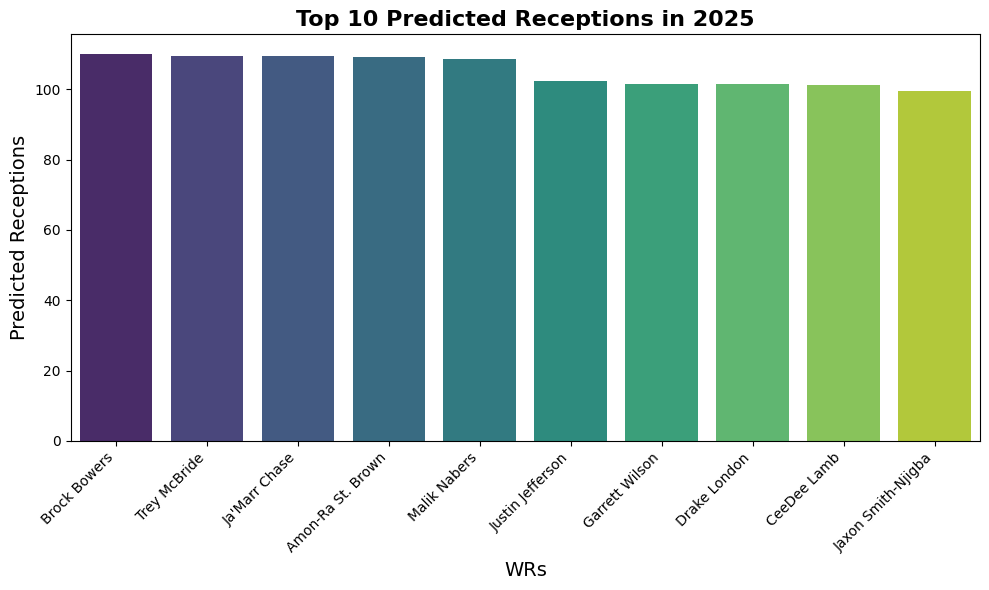

In [267]:
# Plotting the Predicted 2025 Receptions
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Predicted Receptions in 2025', data=top_10_rec, hue='Player', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted Receptions in 2025', fontsize=16, weight='bold')
plt.xlabel('WRs', fontsize=14)
plt.ylabel('Predicted Receptions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### The most valuable WR, based on the data, is Ja'Marr Chase, predicted to have the highest receiving yards (1496.54), TDs (12.94) and third highest receptions (109.35) in 2025.

# Forecasting total fantasy football points for 2025

#### WR Fantasy Football Calculation:

* Receptions: 1 points (only if using PPR scoring)
* Receiving Yards: 1 point per 10 yards
* Receiving Touchdowns: 6 points



In [261]:
# Calculating fantasy pts for Receptions, Receiving Yards and Receiving TDs
merged_rec['Fantasy Receptions (PPR)'] = merged_rec['Predicted Receptions in 2025'] # 1pt per reception
merged_df['Fantasy Receiving Yards'] = merged_df['Predicting Receiving Yards 2025'] / 10  # 1pt per 10 receiving yards
merged_df['Fantasy Receiving TDs'] = merged_df['Predicting Receiving TDs 2025'] * 6 # 6pts per TD scored

# Creating 'Total Fantasy Points' column
merged_df['Total Fantasy Pts 2025'] = merged_rec['Fantasy Receptions (PPR)'] + merged_df['Fantasy Receiving Yards'] + merged_df['Fantasy Receiving TDs']

In [266]:
merged_rec.head()

,Player,Rec_2022,Rec_Yds_2022,Rec_TDs_2022,20+_2022,40+_2022,LNG_2022,Rec 1st_2022,1st%_2022,Rec FUM_2022,...,20+_2024,40+_2024,LNG_2024,Rec 1st_2024,1st%_2024,Rec FUM_2024,Rec YAC_2024,Tgts_2024,Predicted Receptions in 2025,Fantasy Receptions (PPR)
0,A.J. Brown,88.0,1496.0,11.0,23.0,6.0,78.0,59.0,67.0,2.0,...,17.0,5.0,67.0,51.0,76.1,0.0,353.0,97.0,67.80,67.80
1,Aaron Jones,59.0,395.0,5.0,5.0,0.0,30.0,19.0,32.2,2.0,...,4.0,0.0,25.0,20.0,39.2,2.0,411.0,62.0,51.24,51.24
2,Adam Thielen,70.0,716.0,6.0,7.0,0.0,36.0,45.0,64.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,Allen Lazard,60.0,788.0,6.0,13.0,2.0,47.0,45.0,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
4,Alvin Kamara,57.0,490.0,2.0,3.0,1.0,54.0,17.0,29.8,2.0,...,7.0,1.0,57.0,18.0,26.5,1.0,542.0,89.0,68.51,68.51


In [262]:
# Predicting Top 10 WRs by Total Fantasy Pts
top_10_ftsy = merged_df.sort_values(by='Total Fantasy Pts 2025', ascending=False).head(10)

In [263]:
# Displaying Top 10 Fantasy WRs 2025
print(top_10_ftsy[['Player', 'Total Fantasy Pts 2025']].head(10))

                Player  Total Fantasy Pts 2025
53       Ja'Marr Chase                 336.644
72    Justin Jefferson                 298.552
6    Amon-Ra St. Brown                 295.050
16         CeeDee Lamb                 269.804
43        Drake London                 259.556
34       Davante Adams                 252.185
109     Terry McLaurin                 248.314
111       Travis Kelce                 246.358
46      Garrett Wilson                 242.917
0           A.J. Brown                 241.413


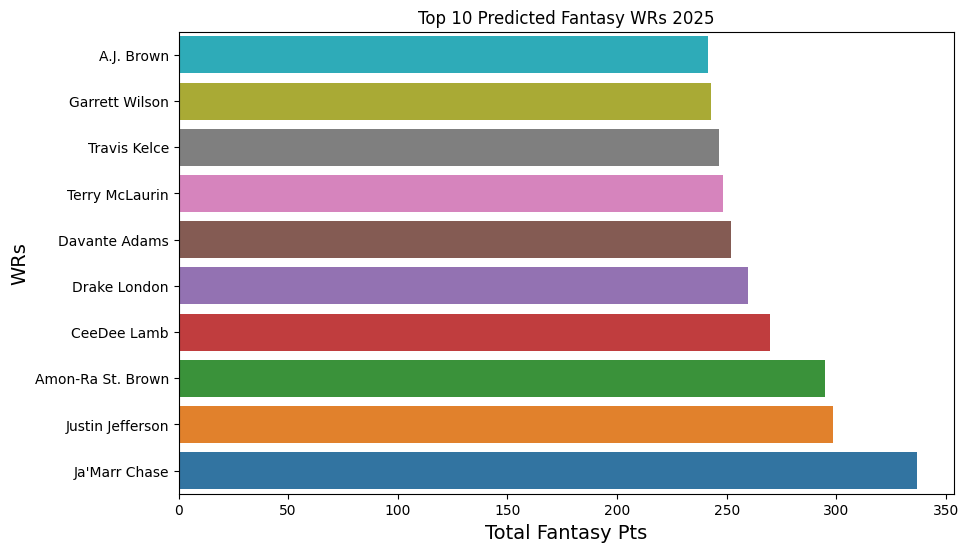

In [269]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Fantasy Pts 2025', y='Player', data=top_10_ftsy, hue='Player', legend=False)

# Adding labels
plt.xlabel('Total Fantasy Pts', fontsize=14)
plt.ylabel('WRs', fontsize=14)
plt.title('Top 10 Predicted Fantasy WRs 2025')
plt.gca().invert_yaxis()
plt.show()

# Conclusion

### Predicted Top 10 WR Receptions 2025:

* Brock Bowers:          **110.09**
* Trey McBride:          **109.52**
* Ja'Marr Chase:         **109.35**
* Amon-Ra St. Brown:     **109.12**
* Malik Nabers:          **108.55**
* Justin Jefferson:      **102.42**
* Garrett Wilson:        **101.49**
* Drake London:          **101.34**
* CeeDee Lamb:           **101.23**
* Jaxon Smith-Njigba:    **99.52**

### Predicted Top 10 WR Receving Yards 2025

* Ja'Marr Chase: **1496.54**
* Justin Jefferson: **1412.92**
* Amon-Ra St. Brown: **1241.90**
* CeeDee Lamb: **1227.94**
* A.J. Brown: **1195.53**
* Tyreek Hill: **1143.80**
* Drake London: **1121.96**
* Davante Adams: **1114.75**
* Travis Kelce: **1077.58**
* Jerry Jeudy: **1077.26**

### Predicted Top 10 WR Receiving TDs 2025

* Ja'Marr Chase: **12.94**
* Mike Evans: **10.47**
* Mark Andrews: **10.37**
* Amon-Ra St. Brown: **10.29**
* Terry McLaurin: **10.24**
* Sam LaPorta: **9.52**
* Davante Adams: **9.24**
* Justin Jefferson: **9.14**
* A.J. Brown: **9.01**
* Tee Higgins: **9.01**

### Predicted Top 10 WR Fantasy Points 2025

* Ja'Marr Chase: **336.644**
* Justin Jefferson: **298.552**
* Amon-Ra St. Brown: **295.050**
* CeeDee Lamb: **269.804**
* Drake London: **259.556**
* Davante Adams: **252.185**
* Terry McLaurin: **248.314**
* Travis Kelce: **246.358**
* Garrett Wilson: **242.917**
* A.J. Brown: **241.413**